In [26]:
# import packages
import numpy as np
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import imageio

In [27]:
# Path to the folder containing the chunked data
data_folder = "../data/"
output_folder = "../output/"

# Load data
FBiH = pd.read_excel(data_folder + "FBiH.xlsx")
AAA = pd.read_csv(output_folder + "AAA_YTM.csv")
euroarea = pd.read_csv(output_folder + "euroarea_YTM.csv")
BAM = pd.read_csv(output_folder + "BAM_YTM.csv")

In [28]:
FBiH.drop(['Auction date', 'Maturity date', 'Amount offered for issue', 'Total amount of received offers','Total amount of accepted offers','Instrument','Coupon', 'm unadjusted'], axis=1, inplace=True)
FBiH

,Settlement date,Price,Interest rate,FV,m
0,2014-02-19,99.7452,0.0102,100,90
1,2014-03-05,99.8004,0.008,100,90
2,2014-03-19,99.8516,0.006,100,90
3,2014-07-23,99.8516,0.0059,100,90
4,2015-04-29,99.8428,0.0063,100,90
...,...,...,...,...,...
102,2022-07-06,99.9217,0.03482,100,2520
103,2019-07-10,99.5360,0.00849,100,3600
104,2021-06-09,99.7454,0.01077,100,3600
105,2022-06-22,99.8080,0.01587,100,3600


In [29]:
FBiH['m_yrs'] = FBiH['m']/360
FBiH['Spot'] = ((FBiH['FV']/FBiH['Price'])**(1/FBiH['m_yrs']))-1

In [30]:
FBiH.drop(['Price', 'Spot', 'FV', 'm'], axis=1, inplace=True)
FBiH['Interest rate'] = FBiH['Interest rate']*100
FBiH

,Settlement date,Interest rate,m_yrs
0,2014-02-19,1.02,0.25
1,2014-03-05,0.8,0.25
2,2014-03-19,0.6,0.25
3,2014-07-23,0.59,0.25
4,2015-04-29,0.63,0.25
...,...,...,...
102,2022-07-06,3.482,7.00
103,2019-07-10,0.849,10.00
104,2021-06-09,1.077,10.00
105,2022-06-22,1.587,10.00


In [31]:
# Pivot the DataFrame
FBiH = FBiH.rename(columns={'Settlement date': 't'})
pivot_FBiH = FBiH.pivot(index='t', columns='m_yrs', values='Interest rate')
pivot_FBiH

m_yrs,0.250000,0.500000,0.750000,1.000000,2.000000,2.777778,5.000000,6.000000,7.000000,10.000000,15.000000
t,,,,,,,,,,,
2011-09-28,NaN,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-11-09,NaN,2.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,NaN,2.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-28,NaN,2.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-25,NaN,2.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-15,NaN,NaN,-0.0299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.587,NaN
2022-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.738,NaN,NaN,NaN


In [32]:
FBiH_filename = 'FBiH.csv'
pivot_FBiH.to_csv(output_folder + FBiH_filename)

In [33]:
FBiH = pd.read_csv(output_folder + "FBiH.csv")
maturity_names = ['3m', '6m', '9m', '1y', '2y', '3y', '5y', '6y', '7y', '10y', '15y'] 
maturity_names.insert(0, 't')
FBiH.columns = maturity_names
FBiH

,t,3m,6m,9m,1y,2y,3y,5y,6y,7y,10y,15y
0,2011-09-28,NaN,2.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-11-09,NaN,2.310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-02-29,NaN,2.455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-03-28,NaN,2.280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-25,NaN,2.210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
102,2022-06-15,NaN,NaN,-0.0299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2022-06-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.587,NaN
104,2022-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.738,NaN,NaN,NaN
105,2022-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.482,NaN,NaN


In [34]:
# Add suffixes to identify columns after merging
FBiH = FBiH.add_suffix('_FBiH')
FBiH_monthly = FBiH.copy()
AAA = AAA.add_suffix('_AAA')
AAA_monthly = AAA.copy()
euroarea = euroarea.add_suffix('_euroarea')
euroarea_monthly = euroarea.copy()
BAM = BAM.add_suffix('_BAM')
BAM_monthly = BAM.copy()

In [35]:
def make_monthly(df, col):
    col= pd.to_datetime(col)
    df.index = col
    df = df.groupby(pd.Grouper(key=col.name, freq='M')).mean(numeric_only = False)
    df = df.reset_index()
    return df

In [ ]:
AAA_monthly = make_monthly(AAA_monthly, AAA_monthly['t_AAA'])
euroarea_monthly = make_monthly(euroarea_monthly, euroarea_monthly['t_euroarea'])
BAM_monthly = make_monthly(BAM_monthly, BAM_monthly['t_BAM'])
FBiH_monthly = make_monthly(FBiH_monthly, FBiH_monthly['t_FBiH'])

In [37]:
# Convert month to datetime format in the monthly dataframes
AAA_monthly['t_AAA'] = pd.to_datetime(AAA['t_AAA'])
euroarea_monthly['t_euroarea'] = pd.to_datetime(euroarea['t_euroarea'])
BAM_monthly['t_BAM'] = pd.to_datetime(BAM['t_BAM'])
FBiH_monthly['t_FBiH'] = pd.to_datetime(FBiH['t_FBiH'])

In [ ]:
# Group by month and calculate monthly averages
FBiH_monthly.index = FBiH_monthly['t_FBiH']
FBiH_monthly = FBiH_monthly.groupby(pd.Grouper(key='t_FBiH', freq='M')).mean(numeric_only = False)
FBiH_monthly = FBiH_monthly.reset_index()

AAA_monthly.index = AAA_monthly['t_AAA']
AAA_monthly = AAA_monthly.groupby(pd.Grouper(key='t_AAA', freq='M')).mean(numeric_only = False)
AAA_monthly = AAA_monthly.reset_index()

euroarea_monthly.index = euroarea_monthly['t_euroarea']
euroarea_monthly = euroarea_monthly.groupby(pd.Grouper(key='t_euroarea', freq='M')).mean(numeric_only = False)
euroarea_monthly = euroarea_monthly.reset_index()

BAM_monthly.index = BAM_monthly['t_BAM']
BAM_monthly = BAM_monthly.groupby(pd.Grouper(key='t_BAM', freq='M')).mean(numeric_only = False)
BAM_monthly = BAM_monthly.reset_index()


In [89]:
BAM['t_BAM'].min()

datetime.date(2011, 5, 11)

In [90]:
AAA['t_AAA'].min()

datetime.date(2004, 9, 6)

In [91]:
# Only take the lines that exist for BAM 
condition_BAM = (BAM['t_BAM'] > AAA['t_AAA'].max())
condition_FBiH = (FBiH['t_FBiH'] > AAA['t_AAA'].max())
condition_AAA = (AAA['t_AAA'] < BAM['t_BAM'].min())
BAM = BAM.drop(BAM[condition_BAM].index)
FBiH = FBiH.drop(FBiH[condition_FBiH].index)
AAA = AAA.drop(AAA[condition_AAA].index)

In [92]:
merged_YTM = pd.merge(FBiH, AAA, left_on='t_FBiH', right_on='t_AAA', how='right')
merged_YTM = pd.merge(merged_YTM, euroarea, left_on='t_AAA', right_on='t_euroarea', how='outer')
merged_YTM = pd.merge(merged_YTM, BAM, left_on='t_AAA', right_on='t_BAM', how='left')

In [ ]:
merged_YTM = merged_YTM.dropna(subset=['t_BAM'])
merged_YTM

In [95]:
# BAM spans the longest period of time 
merged_YTM['rank'] = merged_YTM['t_AAA'].rank(ascending=True)
merged_YTM = merged_YTM.sort_values(by='rank')
merged_YTM.drop(['rank'], axis=1, inplace=True)

In [96]:
Merged_filename = 'Merged.csv'
merged_YTM.to_csv(output_folder + Merged_filename)

<Axes: >

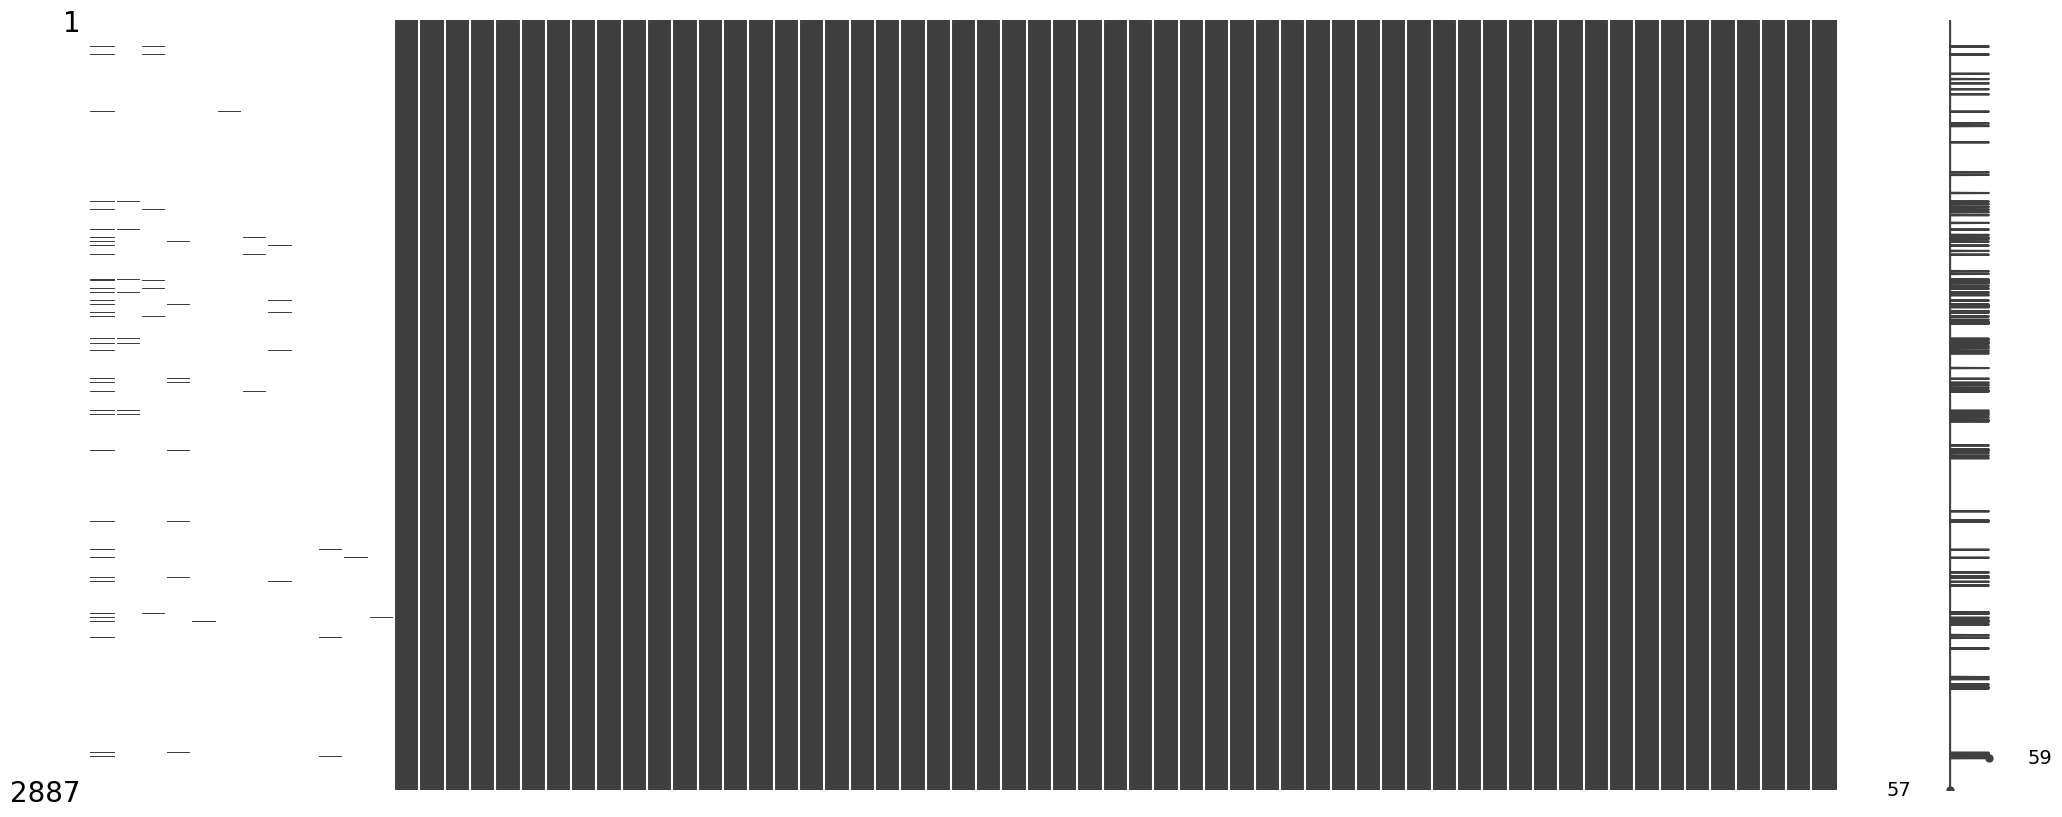

In [97]:
import missingno as msno
msno.matrix(merged_YTM)

The leftmost is FBiH, then AAA and Euroarea, which have an identical span of observations, then the rightmost is BAM

In [98]:
merged_YTM_monthly = merged_YTM.copy()
merged_YTM_monthly['t'] = pd.to_datetime(merged_YTM_monthly['t_AAA'])

In [99]:
def drop_day(date):
    return ''.join([char for i, char in enumerate(date) if i not in [7,8,9]])

In [100]:
#merged_YTM_monthly= merged_YTM_monthly.drop('t_FBiH', axis=1)
merged_YTM_monthly['t_FBiH'] = merged_YTM_monthly['t_FBiH'].astype(str)

In [101]:
merged_YTM_monthly['t_FBiH']

0       nan
1       nan
2       nan
3       nan
4       nan
       ... 
2970    nan
2971    nan
2972    nan
2973    nan
2974    nan
Name: t_FBiH, Length: 2887, dtype: object

In [103]:
# Group by month and calculate monthly averages
merged_YTM_monthly = merged_YTM_monthly.groupby(pd.Grouper(key='t', freq='M')).mean()

/var/folders/07/r8yrsw3j65v2937ssq1kyq8r0000gn/T/ipykernel_33011/3254229978.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_YTM_monthly = merged_YTM_monthly.groupby(pd.Grouper(key='t', freq='M')).mean()


In [104]:
def split_dataframe_by_suffix(df, suffix):
    matching_columns = [col for col in df.columns if col.endswith(suffix)]
    df_suffix = df[matching_columns]
    #df_remainder = df.drop(columns=matching_columns)
    return df_suffix

In [105]:
# Daily data
FBiH = split_dataframe_by_suffix(merged_YTM, '_FBiH')
AAA = split_dataframe_by_suffix(merged_YTM, '_AAA')
euroarea = split_dataframe_by_suffix(merged_YTM, '_euroarea')
BAM = split_dataframe_by_suffix(merged_YTM, '_BAM')

In [106]:
# Monthly data
FBiH_monthly = split_dataframe_by_suffix(merged_YTM_monthly, '_FBiH')
AAA_monthly = split_dataframe_by_suffix(merged_YTM_monthly, '_AAA')
euroarea_monthly = split_dataframe_by_suffix(merged_YTM_monthly, '_euroarea')
BAM_monthly = split_dataframe_by_suffix(merged_YTM_monthly, '_BAM')

In [107]:
# Transpose the dataframes daily
transposed_FBiH = FBiH.drop('t_FBiH', axis=1).T
transposed_FBiH.columns = FBiH['t_FBiH']
transposed_AAA = AAA.drop('t_AAA', axis=1).T
transposed_AAA.columns = AAA['t_AAA']
transposed_euroarea = euroarea.drop('t_euroarea', axis=1).T
transposed_euroarea.columns = euroarea['t_euroarea']
transposed_BAM = BAM.drop('t_BAM', axis=1).T
transposed_BAM.columns = BAM['t_BAM']
transposed_AAA

t_AAA,2011-05-11,2011-05-12,2011-05-13,2011-05-16,2011-05-17,2011-05-18,2011-05-20,2011-05-23,2011-05-24,2011-05-25,...,2022-12-16,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-27,2022-12-28,2022-12-29,2022-12-30
1d_AAA,0.879615,0.889682,0.922871,0.935366,0.926783,0.943560,0.944084,0.930551,0.932956,0.918772,...,0.986762,1.033274,1.108673,1.227082,1.276723,1.280681,1.371952,1.325420,1.215882,1.110282
1m_AAA,0.922510,0.929647,0.962267,0.975390,0.966871,0.983105,0.982866,0.967066,0.969714,0.952975,...,1.216988,1.257039,1.307473,1.412291,1.462703,1.455823,1.533115,1.498971,1.421762,1.335692
3m_AAA,1.009421,1.010803,1.042251,1.056606,1.048213,1.063352,1.061602,1.041357,1.044506,1.022787,...,1.592632,1.619039,1.636924,1.717292,1.769422,1.750226,1.804506,1.789419,1.761491,1.710096
6m_AAA,1.135273,1.128754,1.158457,1.174503,1.166287,1.179853,1.175995,1.149681,1.153578,1.125126,...,1.964031,1.971405,1.972342,2.024245,2.079063,2.058004,2.089131,2.090595,2.104636,2.092719
9m_AAA,1.255904,1.242312,1.270289,1.287846,1.279794,1.291863,1.286080,1.254368,1.259010,1.224651,...,2.179336,2.171122,2.175648,2.207203,2.264652,2.251950,2.269272,2.278150,2.310214,2.325662
1y_AAA,1.371527,1.351631,1.377905,1.396808,1.388905,1.399552,1.392014,1.355531,1.360911,1.321412,...,2.295875,2.276041,2.292874,2.310399,2.370308,2.369689,2.379211,2.390295,2.426932,2.460508
1.5y_AAA,1.588564,1.558156,1.581093,1.602236,1.594596,1.602611,1.592029,1.547708,1.554545,1.506839,...,2.369680,2.337123,2.382575,2.385084,2.449274,2.471936,2.475782,2.484428,2.512841,2.563979
2y_AAA,1.787927,1.749472,1.769184,1.792037,1.784615,1.790257,1.777188,1.727033,1.735298,1.681806,...,2.353046,2.317665,2.384269,2.382011,2.449678,2.487940,2.492056,2.496117,2.511002,2.565336
3y_AAA,2.139199,2.090667,2.104312,2.129294,2.122200,2.123783,2.107119,2.050194,2.061210,2.001965,...,2.275925,2.248319,2.332021,2.331634,2.404474,2.452971,2.461602,2.460086,2.456581,2.502110
4y_AAA,2.435404,2.382894,2.391040,2.416853,2.409971,2.408277,2.389459,2.330715,2.344324,2.285093,...,2.228650,2.213107,2.297624,2.301293,2.377745,2.423084,2.435913,2.434268,2.424919,2.459774


In [109]:
len(transposed_AAA.iloc[:, 2000])

18

### Example plot:

In [110]:
transposed_AAA.iloc[:, 2886].name

datetime.date(2022, 12, 30)

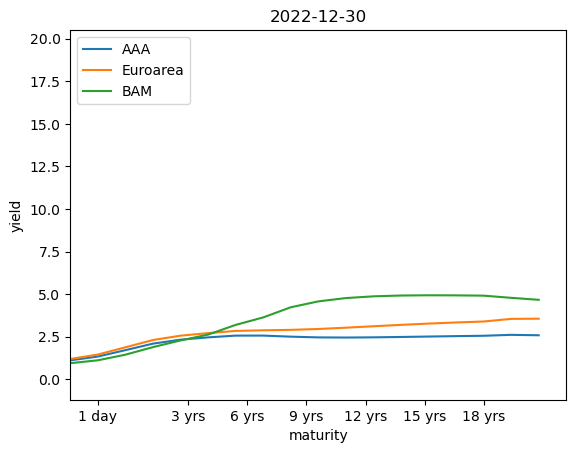

In [111]:
# Create a new figure and axis
fig, ax = plt.subplots()

period = 2886
n_maturities = 18
x = np.linspace(0, n_maturities - 1, n_maturities, dtype=int)
ax.plot(x,transposed_AAA.iloc[:, period], label='AAA')
ax.plot(x,transposed_euroarea.iloc[:, period], label='Euroarea')
ax.plot(x,transposed_BAM.iloc[:, period], label='BAM')
# Set axis limits
ax.set_xlim(0,18)
ax.set_ylim(-1.2,20.5)
# Add labels and legend
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend(loc='upper left')

# Define custom x-axis tick locations and labels
tick = 15/7
custom_ticks = [1, tick*2, tick*3, tick*4, tick*5 ,tick*6, tick*7]
custom_tick_labels = ['1 day', '3 yrs', '6 yrs', '9 yrs', '12 yrs', '15 yrs', '18 yrs']
plt.xticks(custom_ticks, custom_tick_labels)

ax.set_title(transposed_AAA.iloc[:, period].name)

# Display the plot
plt.show()

Nan requests: Triple A: blue solid, euroarea: blue dashed, change BAM into RS, use red, yellow for predicted FbiH. predicted FBiH = AAA + 0.5 * RS
 

In [128]:
# Create a list to store the plots
plots = []
dpi = 300

for period in range(len(AAA['t_AAA'])-1):
#for period in range(10):
    # Create a new figure and axis
    fig, ax = plt.subplots()

    #period = 2888
    n_maturities = 18
    x = np.linspace(0, n_maturities - 1, n_maturities, dtype=int)
    ax.plot(x,transposed_AAA.iloc[:, period], label='AAA')
    ax.plot(x,transposed_euroarea.iloc[:, period], label='Euroarea')
    ax.plot(x,transposed_BAM.iloc[:, period], label='BAM')
    # Set axis limits
    ax.set_xlim(0,18)
    ax.set_ylim(-1.2,20.5)
    # Add labels and legend
    plt.xlabel('maturity')
    plt.ylabel('yield')
    plt.legend(loc='upper left')

    # Define custom x-axis tick locations and labels
    tick = 15/7
    custom_ticks = [1, tick*2, tick*3, tick*4, tick*5 ,tick*6, tick*7]
    custom_tick_labels = ['1 day', '3 yrs', '6 yrs', '9 yrs', '12 yrs', '15 yrs', '18 yrs']
    plt.xticks(custom_ticks, custom_tick_labels)

    # Title is the date of the period
    ax.set_title(transposed_AAA.iloc[:, period].name)

    # Convert plot to image:
    # Create a FigureCanvas instance
    canvas = FigureCanvas(fig)
    canvas.figure.set_dpi(dpi)

    # Render the figure into an image
    canvas.draw()

    # Get the image as a numpy array
    image = np.array(canvas.renderer.buffer_rgba())

    plt.axis('off')

    # Append the plot to the list
    plots.append(image)

    # Close the figure to avoid displaying it
    plt.close(fig)



In [129]:
# Determine the video properties
fps = 25.0  # Frames per second
motion_filename = 'yield_curves.mp4'
output_file = output_folder + motion_filename

# Write the images to the video
imageio.mimwrite(output_file, plots, fps=fps)